# Problem Set 3

Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.

## Question 1

#### Occupations Data.

In [4]:
# Step 1: Import the necessary libraries
import pandas as pd
from tabulate import tabulate

# Step 2: Import the dataset from this address
url_path = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

# Step 3: Assign it to a variable called users
users = pd.read_csv(url_path, sep='|', index_col = 'user_id')
# Step 4: Discover what is the mean age per occupation

mean_age_per_occupation = users.groupby('occupation')['age'].mean().reset_index()
mean_age_per_occupation.columns = ['Occupation', 'Mean Age']
print("\nMean Age per Occupation:\n", tabulate(mean_age_per_occupation, headers='keys', tablefmt='pretty', showindex=False))


# Step 5: Discover the Male ratio per occupation and sort it from the most to the least

male_ratio_per_occupation = users.groupby(['occupation', 'gender']).size().unstack().fillna(0)
male_ratio_per_occupation['male_ratio'] = male_ratio_per_occupation['M'] / (male_ratio_per_occupation['M'] + male_ratio_per_occupation['F'])
male_ratio_per_occupation_sorted = male_ratio_per_occupation.sort_values(by='male_ratio', ascending=False)['male_ratio'].reset_index()
male_ratio_per_occupation_sorted.columns = ['Occupation', 'Male Ratio']
print("\nMale Ratio per Occupation (sorted) from the most to the least:\n", tabulate(male_ratio_per_occupation_sorted, headers='keys', tablefmt='pretty', showindex=False))

# Step 6: For each occupation, calculate the minimum and maximum ages

min_max_ages_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max']).reset_index()
print("\nMinimum and Maximum Ages per Occupation:\n", tabulate(min_max_ages_per_occupation, headers='keys', tablefmt='pretty', showindex=False))

# Step 7: For each combination of occupation and sex, calculate the mean age

mean_age_per_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean().reset_index()

# Separate DataFrame for Females (F)
mean_age_female = mean_age_per_occupation_sex[mean_age_per_occupation_sex['gender'] == 'F']
mean_age_female.columns = ['Occupation', 'Gender', 'Mean Age']
print("\nMean Age per Occupation for Females:\n", tabulate(mean_age_female, headers='keys', tablefmt='pretty', showindex=False))

# Separate DataFrame for Males (M)
mean_age_male = mean_age_per_occupation_sex[mean_age_per_occupation_sex['gender'] == 'M']
mean_age_male.columns = ['Occupation', 'Gender', 'Mean Age']
print("\nMean Age per Occupation for Males:\n", tabulate(mean_age_male, headers='keys', tablefmt='pretty', showindex=False))


# Step 8: For each occupation present the percentage of women and men

gender_percentage_per_occupation = users.groupby(['occupation', 'gender']).size().unstack().fillna(0)
gender_percentage_per_occupation['female_percentage'] = (gender_percentage_per_occupation['F'] / (gender_percentage_per_occupation['M'] + gender_percentage_per_occupation['F'])) * 100
gender_percentage_per_occupation['male_percentage'] = (gender_percentage_per_occupation['M'] / (gender_percentage_per_occupation['M'] + gender_percentage_per_occupation['F'])) * 100
gender_percentage_per_occupation = gender_percentage_per_occupation.reset_index()
print("\nGender Percentage per Occupation:\n", tabulate(gender_percentage_per_occupation, headers='keys', tablefmt='pretty', showindex=False))





Mean Age per Occupation:
 +---------------+--------------------+
|  Occupation   |      Mean Age      |
+---------------+--------------------+
| administrator | 38.74683544303797  |
|    artist     | 31.392857142857142 |
|    doctor     | 43.57142857142857  |
|   educator    | 42.01052631578948  |
|   engineer    | 36.38805970149254  |
| entertainment | 29.22222222222222  |
|   executive   |      38.71875      |
|  healthcare   |      41.5625       |
|   homemaker   | 32.57142857142857  |
|    lawyer     |       36.75        |
|   librarian   |        40.0        |
|   marketing   | 37.61538461538461  |
|     none      | 26.555555555555557 |
|     other     | 34.523809523809526 |
|  programmer   | 33.121212121212125 |
|    retired    | 63.07142857142857  |
|   salesman    | 35.666666666666664 |
|   scientist   | 35.54838709677419  |
|    student    | 22.081632653061224 |
|  technician   | 33.148148148148145 |
|    writer     | 36.31111111111111  |
+---------------+--------------------

## Question 2

#### Euro Teams Data

In [5]:
# Step 1: Import the necessary libraries
import pandas as pd
from tabulate import tabulate

#Step 2: Import the dataset from the given address
url_path = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

#Step 3: Assign it to a variable called euro12
euro12 = pd.read_csv(url_path)


#Step 4: Select only the Goal column

goals = euro12['Goals']
print("\nGoals Column Selected\n")
print(tabulate(goals.to_frame(), headers='keys', tablefmt='pretty', showindex=False))

#Step 5: How many teams participated in Euro 2012?

teams_in_2012 = euro12['Team'].nunique()
print("\nNumber of Teams Participated in Euro 2012:", teams_in_2012)

# Step 6: What is the number of columns in the dataset?

total_columns = len(euro12.columns)
print("\nNumber of Columns in the Dataset:", total_columns)

#Step 7: View only the columns Team, Yellow Cards, and Red Cards and assign them to a dataframe called discipline

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print("\nDiscipline Dataframe Created\n")
print(tabulate(discipline, headers='keys', tablefmt='pretty', showindex=False))

#Step 8: Sort the teams by Red Cards, then Yellow Cards

sorted_data = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)
print("\nSorted Data\n")
print(tabulate(sorted_data, headers='keys', tablefmt='pretty', showindex=False))

#Step 9: Calculate the mean Yellow Cards given per Team

mean_yellow_cards_per_team = discipline['Yellow Cards'].mean()
print("\nMean Yellow Cards per Team:", mean_yellow_cards_per_team)

#Step 10: Filter teams that scored more than 6 goals

filter_teams_data = euro12[euro12['Goals'] > 6][['Team', 'Goals']]
print("\neams with More Than 6 Goals\n")
print(tabulate(filter_teams_data, headers='keys', tablefmt='pretty', showindex=False))

#Step 11: Select the teams that start with G

teams_starts_with_G = euro12[euro12['Team'].str.startswith('G')][['Team', 'Goals']]
print("\nTeams Starting with 'G'\n")
print(tabulate(teams_starts_with_G, headers='keys', tablefmt='pretty', showindex=False))

#Step 12: Select the first 7 columns

first_seven_columns = euro12.iloc[:, :7]
print("\nFirst Seven Columns\n")
print(tabulate(first_seven_columns, headers='keys', tablefmt='pretty', showindex=False))

#Step 13: Select all columns except the last 3

all_columns_except_last_three = euro12.iloc[:, :-3]
print("\nStep 13: All Columns Except the Last 3\n")
print(all_columns_except_last_three)

#Step 14: Present only the Shooting Accuracy from England, Italy, and Russia

shooting_data = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
print("\nStep 14: Shooting Accuracy from England, Italy, and Russia\n")
print(tabulate(shooting_data, headers='keys', tablefmt='pretty', showindex=False))




Goals Column Selected

+-------+
| Goals |
+-------+
|   4   |
|   4   |
|   4   |
|   5   |
|   3   |
|  10   |
|   5   |
|   6   |
|   2   |
|   2   |
|   6   |
|   1   |
|   5   |
|  12   |
|   5   |
|   2   |
+-------+

Number of Teams Participated in Euro 2012: 16

Number of Columns in the Dataset: 35

Discipline Dataframe Created

+---------------------+--------------+-----------+
|        Team         | Yellow Cards | Red Cards |
+---------------------+--------------+-----------+
|       Croatia       |      9       |     0     |
|   Czech Republic    |      7       |     0     |
|       Denmark       |      4       |     0     |
|       England       |      5       |     0     |
|       France        |      6       |     0     |
|       Germany       |      4       |     0     |
|       Greece        |      9       |     1     |
|        Italy        |      16      |     0     |
|     Netherlands     |      5       |     0     |
|       Poland        |      7       |     1    

## Question 3

#### Housing Data

In [6]:
#Step 1: Import the necessary libraries
import pandas as pd
import numpy as np
from tabulate import tabulate

#Step 2 : Create three different Series
np.random.seed(42)  # Setting seed for reproducibility
series_1 = pd.Series(np.random.randint(1, 5, size=100), name='bedrs')
series_2 = pd.Series(np.random.randint(1, 4, size=100), name='bathrs')
series_3 = pd.Series(np.random.randint(10000, 30001, size=100), name='price_sqr_meter')

#Step 3: Create a DataFrame by joining the Series by column
df = pd.concat([series_1, series_2, series_3], axis=1)

#Step 4:  Change the name of the columns
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

#Step 5: Create a one-column DataFrame with the values of the 3 Series
bigcolumn = pd.DataFrame(pd.concat([series_1, series_2, series_3]))

#Step 6:  Check if it goes only until index 99
print("Index goes only until 99:", bigcolumn.index.max() == 99)

#Step 7: Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(drop=True, inplace=True)

# Display the result in tabular format
print("\nReindexed bigcolumn so it goes from 0 to 299 :\n")
print(tabulate(bigcolumn, headers='keys', tablefmt='pretty'))


Index goes only until 99: True

Reindexed bigcolumn so it goes from 0 to 299 :

+-----+-------+
|     |   0   |
+-----+-------+
|  0  |   3   |
|  1  |   4   |
|  2  |   1   |
|  3  |   3   |
|  4  |   3   |
|  5  |   4   |
|  6  |   1   |
|  7  |   1   |
|  8  |   3   |
|  9  |   2   |
| 10  |   3   |
| 11  |   3   |
| 12  |   3   |
| 13  |   3   |
| 14  |   4   |
| 15  |   1   |
| 16  |   4   |
| 17  |   4   |
| 18  |   4   |
| 19  |   3   |
| 20  |   2   |
| 21  |   1   |
| 22  |   2   |
| 23  |   4   |
| 24  |   4   |
| 25  |   2   |
| 26  |   2   |
| 27  |   2   |
| 28  |   4   |
| 29  |   4   |
| 30  |   1   |
| 31  |   1   |
| 32  |   4   |
| 33  |   2   |
| 34  |   2   |
| 35  |   1   |
| 36  |   4   |
| 37  |   1   |
| 38  |   1   |
| 39  |   3   |
| 40  |   3   |
| 41  |   3   |
| 42  |   2   |
| 43  |   4   |
| 44  |   4   |
| 45  |   4   |
| 46  |   4   |
| 47  |   3   |
| 48  |   2   |
| 49  |   2   |
| 50  |   3   |
| 51  |   2   |
| 52  |   3   |
| 53  |   4   |
| 54  | 

## Question 4

#### Wind Statistics

In [10]:
# Step 1 
import pandas as pd
import numpy as np
from datetime import datetime



# Step 2 
dataset_path = "./wind.txt"
data = pd.read_table(dataset_path, sep="\s+")

# Step 3
data.index = pd.to_datetime(data.index)

# Step 4
def fix_year(x):
    return x.replace(year=1961)
data.index = data.index.map(fix_year)

# Step 5  
data.index.name = None

# Step 6
nulls_per_location = data.isna().sum()
print("Number of Missing Values per Location:")
print(nulls_per_location)

# Step 7 
total_values = data.count().sum()
print("\nTotal Number of Non-Missing Values:", total_values)

# Step 8
mean_all = data.mean().mean()
print("\nMean Windspeed Across All Locations and Times:", mean_all)

#Step 9: Calculate min, max, mean, and std for each location
loc_stats = data.describe().transpose()[['min', 'max', 'mean', 'std']]

# Print 
print("\nLocation statistics\n", tabulate(loc_stats, headers='keys', tablefmt='pretty'))

#Step 10
day_stats = data.T.describe()
print("\n\n\nDay Statistics:")
print(day_stats)

# Step 11
january_avg = data[data.index.month == 1].mean()

# Print 
print("\nAverage windspeed in January for each location\n", tabulate(january_avg.reset_index(), headers='keys', tablefmt='pretty', showindex=False))
# Step 12 to 14: Downsample the record to yearly, monthly, and weekly frequency
data_yearly = data.resample('Y').mean()
data_monthly = data.resample('M').mean()
data_weekly = data.resample('W-Mon').mean()

print("\nDownsampled to yearly frequency\n",data_yearly)
print("\nDownsampled to monthly frequency\n", data_monthly)
print("\nDownsampled to weekly frequency\n", data_weekly)

# Step 15
weekly_stats = data_weekly.head(52).describe().transpose()[['min', 'max', 'mean', 'std']]

print("\nWeekly statistics for the first 52 weeks\n", tabulate(weekly_stats, headers='keys', tablefmt='pretty'))

Number of Missing Values per Location:
Yr     0
Mo     0
Dy     0
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Total Number of Non-Missing Values: 98579

Mean Windspeed Across All Locations and Times: 14.299199599246569

Location statistics
 +-----+------+-------+--------------------+--------------------+
|     | min  |  max  |        mean        |        std         |
+-----+------+-------+--------------------+--------------------+
| Yr  | 61.0 | 78.0  | 69.50030422878004  | 5.1881311286897445 |
| Mo  | 1.0  | 12.0  | 6.523273501673258  | 3.4488710574193893 |
| Dy  | 1.0  | 31.0  | 15.728627928202007 | 8.800334974744912  |
| RPT | 0.67 | 35.8  | 12.362987210718636 | 5.618412959473287  |
| VAL | 0.21 | 33.37 | 10.644314411809468 | 5.267356471594362  |
| ROS | 1.5  | 33.84 | 11.660526475958614 | 5.008449958866736  |
| KIL | 0.0  | 28.46 | 6.306468260009134  | 3.605811207145495  |
| SHA | 0.13 | 37.54 | 10.45583

## Question 5

#### Restaurant Data

In [21]:
#Step 1: Import the necessary libraries
import pandas as pd
from tabulate import tabulate

#Step 2: Import the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

#Step 3. Assign it to a variable called chipo.
chipo = pd.read_csv(url, sep='\t')

#Step 4: See the first 10 entries
print("\nFirst 10 entries\n", tabulate(chipo.head(10), headers='keys', tablefmt='pretty'))

#Step 5: Number of observations
num_observations = len(chipo)
print("\nNumber of observations =", num_observations)

#Step 6: Number of columns
num_columns = chipo.shape[1]
print("\nNumber of columns =", num_columns)

#Step 7: Print the name of all columns
column_names = chipo.columns.tolist()
print("\nColumns\n", tabulate([(i,) for i in column_names], headers=['Column Name'], tablefmt='pretty'))

#Step 8: How is the dataset indexed?
index_type = chipo.index
print("\nIndex Type =", type(index_type))

#Step 9: Most-ordered item
most_ordered_item = chipo['item_name'].mode().iloc[0]
print("\n\Most-ordered item =", most_ordered_item)

#Step 10: Quantity of the most-ordered item
quantity_most_ordered_item = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("\nQuantity of most-ordered item =", quantity_most_ordered_item)

#Step 11: Most ordered item in the choice_description column
most_ordered_choice = chipo['choice_description'].mode().iloc[0]
print("\nMost-ordered item in choice_description =", most_ordered_choice)

#Step 12: Total items ordered
total_items_ordered = chipo['quantity'].sum()
print("\nTotal items ordered =", total_items_ordered)

#Step 13: Turn item price into a float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
print("\nCheck item price type =", chipo['item_price'].dtype)

#Step 14: Revenue for the period
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("\nRevenue for the period =", revenue)

#Step 15: Number of orders made
num_orders = chipo['order_id'].nunique()
print("\nNumber of orders made =", num_orders)

#Step 16: Average revenue amount per order
avg_revenue_per_order = revenue / num_orders
print("\nAverage revenue amount per order =", avg_revenue_per_order)

#Step 17: Number of different items sold
num_different_items = chipo['item_name'].nunique()
print("\nNumber of different items sold =", num_different_items)



First 10 entries
 +---+----------+----------+---------------------------------------+--------------------------------------------------------------------------------------------------------------------+------------+
|   | order_id | quantity |               item_name               |                                                 choice_description                                                 | item_price |
+---+----------+----------+---------------------------------------+--------------------------------------------------------------------------------------------------------------------+------------+
| 0 |    1     |    1     |     Chips and Fresh Tomato Salsa      |                                                        nan                                                         |   $2.39    |
| 1 |    1     |    1     |                 Izze                  |                                                    [Clementine]                                                    |   $3

## Question 6

#### Marriage/Divorce Data

Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

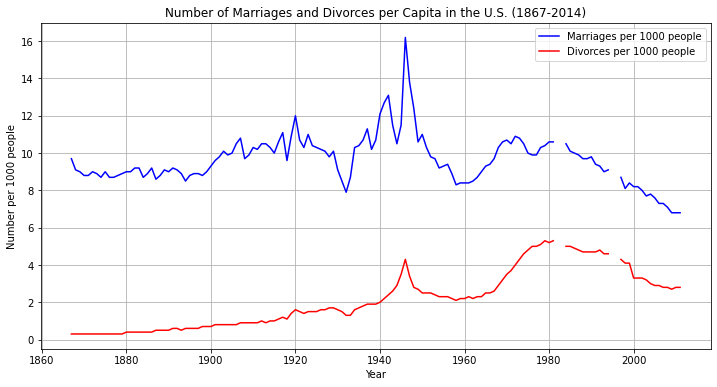

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data
data_path = r"./us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(data_path)

# Step 2: Ensure the data is one-dimensional
years = data['Year'].values
marriages = data['Marriages_per_1000'].values
divorces = data['Divorces_per_1000'].values

# Step 3: Plotting the data
plt.figure(figsize=(12, 6))

# Step 4: Plotting the number of marriages per capita
plt.plot(years, marriages, label='Marriages per 1000 people', color='blue')

# Step 5: Plotting the number of divorces per capita
plt.plot(years, divorces, label='Divorces per 1000 people', color='red')

# Step 6: Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number per 1000 people')
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1867-2014)')

# Step 7: Adding legend
plt.legend()

# Step 8: Display the plot
plt.grid(True)
plt.show()

## Question 7

#### Marriage/Divorce Data

Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

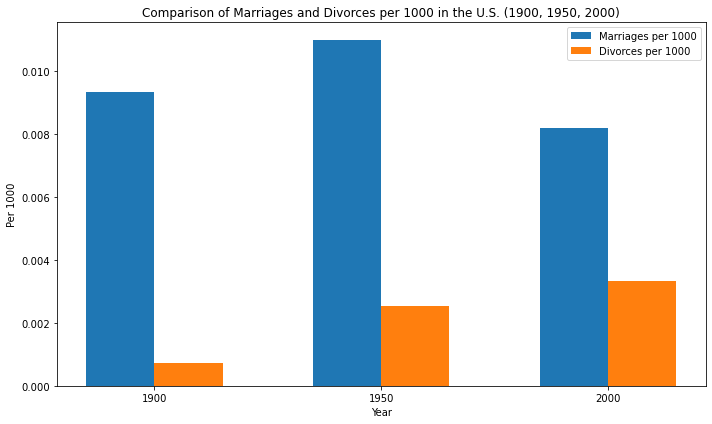

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data
data_path = r"./us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(data_path)

# Step 2: Filter data for the years 1900, 1950, and 2000
years = [1900, 1950, 2000]
filtered_data = data[data['Year'].isin(years)].copy()

# Step 3: Calculate per 1000 values using .loc indexer
filtered_data.loc[:, 'Marriages_per_1000'] = filtered_data['Marriages'] / filtered_data['Population']
filtered_data.loc[:, 'Divorces_per_1000'] = filtered_data['Divorces'] / filtered_data['Population']

# Step 4: Create the vertical bar chart
plt.figure(figsize=(10, 6))

x = filtered_data['Year']
marriages_per_1000 = filtered_data['Marriages_per_1000']
divorces_per_1000 = filtered_data['Divorces_per_1000']

bar_width = 15
plt.bar(x - bar_width/2, marriages_per_1000, width=bar_width, label='Marriages per 1000')
plt.bar(x + bar_width/2, divorces_per_1000, width=bar_width, label='Divorces per 1000')

plt.xlabel('Year')
plt.ylabel('Per 1000')
plt.title('Comparison of Marriages and Divorces per 1000 in the U.S. (1900, 1950, 2000)')
plt.xticks(years)
plt.legend()

plt.tight_layout()
plt.show()

## Question 8

#### Kill Count Data

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

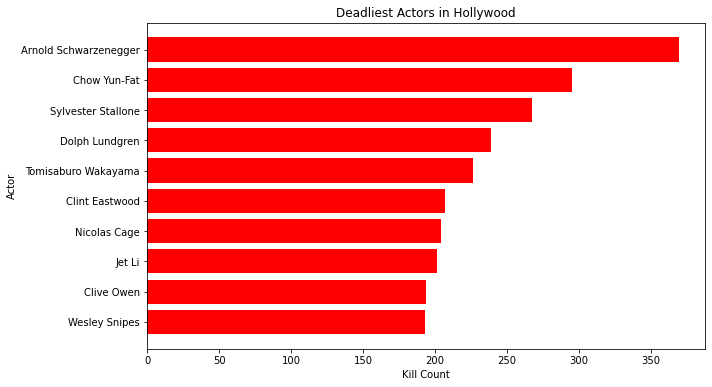

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data
file_path = r"./actor_kill_counts.csv"
data = pd.read_csv(file_path)

# Step 2: Sort the data by kill count in descending order
sorted_data = data.sort_values(by='Count', ascending=True)

# Step 3: Plotting the data
plt.figure(figsize=(10, 6))

# Step 3: Creating horizontal bar chart
plt.barh(sorted_data['Actor'], sorted_data['Count'], color='red')

# Step 4: Adding labels and title
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

# Step 5: Display the plot
plt.show()


## Question 9

#### Roman Emperor Assassinations Data 

Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

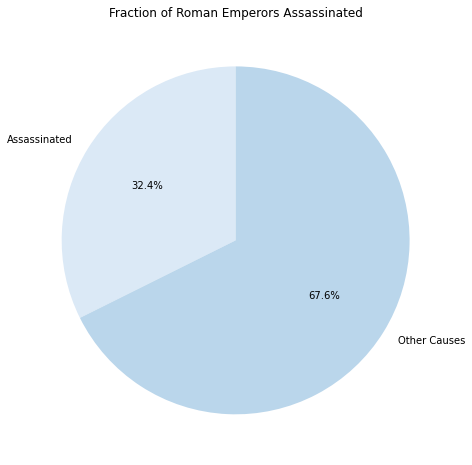

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data
file_path = r"./roman-emperor-reigns.csv"
data = pd.read_csv(file_path)

# Step 2: Count the number of emperors who were assassinated
assassinated_count = data[data['Cause_of_Death'] == 'Assassinated'].shape[0]

# Step 3: Count the number of emperors who had other causes of death
other_count = data.shape[0] - assassinated_count

# Step 4: Create data for the pie chart
labels = ['Assassinated', 'Other Causes']
sizes = [assassinated_count, other_count]

# Step 5: Plotting the data
plt.figure(figsize=(8, 8))

# Step 6: Choose shades of blue
colors = sns.color_palette("Blues")

# Step 7: Creating pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# Step 8: Adding title
plt.title('Fraction of Roman Emperors Assassinated')

# Step 9: Display the plot
plt.show()


## Question 10

#### Arcade Revenue vs CS Doctorates

Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

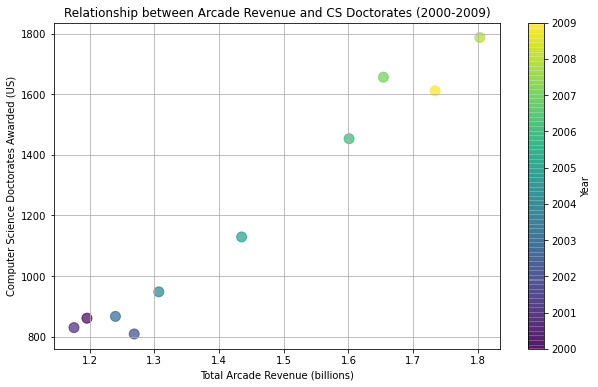

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data
file_path = r"./arcade-revenue-vs-cs-doctorates.csv"
data = pd.read_csv(file_path)

# Step 2: Plotting the data
plt.figure(figsize=(10, 6))

# Step 3: Scatter plot with color-coded dots for each year
scatter = plt.scatter(
    data['Total Arcade Revenue (billions)'],
    data['Computer Science Doctorates Awarded (US)'],
    c=data['Year'],
    cmap='viridis',
    s=100,  # Step : Marker size
    alpha=0.7,  # Step : Transparency
)

# Step 4: Adding colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Year')

# Step 5: Adding labels and title
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Arcade Revenue and CS Doctorates (2000-2009)')
plt.grid(True)

# Step 6: Display the plot
plt.show()
